<a href="https://colab.research.google.com/github/abdullatifm1127/PCVK_GANJIL_2025/blob/main/WEEK_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

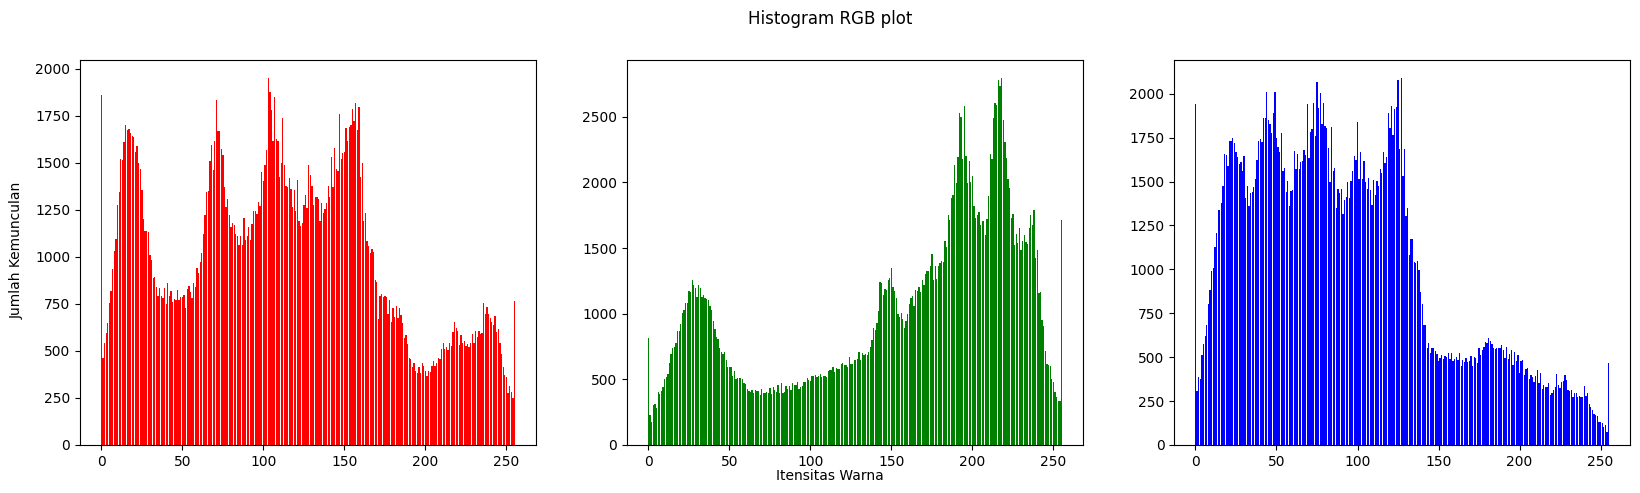

In [ ]:
img = cv.imread('/content/drive/MyDrive/Tugas PCVK/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0, height):
  for x in range(0, width):
    red[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    blue[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize = [20,5], sharex = True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Itensitas Warna', ha='center')
axs[0].bar(names, green, color='red')
axs[1].bar(names, red, color='green')
axs[2].bar(names, blue, color='blue')

**PERTANYAAN PRAKTIKUM D1**

1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

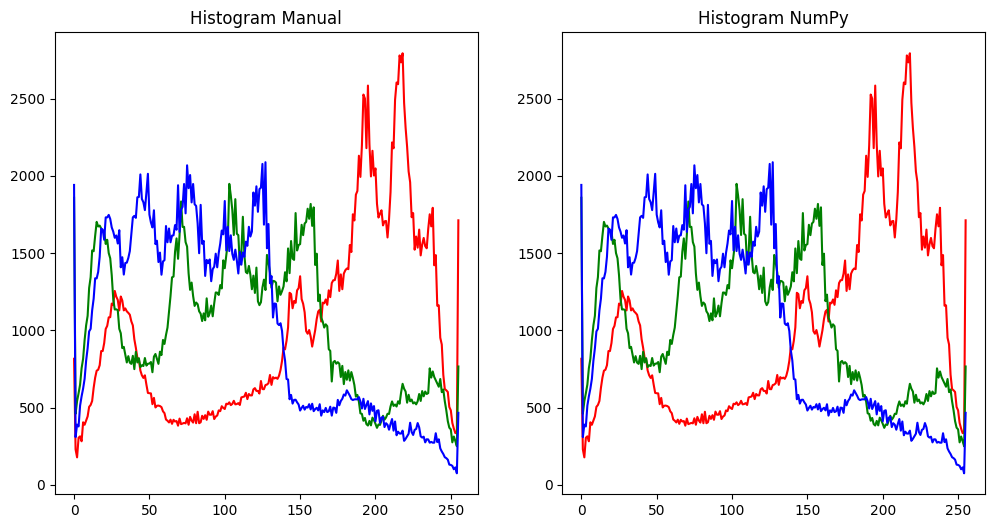

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca citra dan konversi ke RGB
img = cv.imread('/content/drive/MyDrive/Tugas PCVK/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# ---- 1. Histogram manual (looping) ----
height, width, depth = np.shape(img)

red_manual = [0]*256
green_manual = [0]*256
blue_manual = [0]*256

for y in range(height):
    for x in range(width):
        r, g, b = img[y, x]
        red_manual[r] += 1
        green_manual[g] += 1
        blue_manual[b] += 1

# ---- 2. Histogram dengan NumPy ----
red_np, _ = np.histogram(img[:,:,0], bins=256, range=(0,256))
green_np, _ = np.histogram(img[:,:,1], bins=256, range=(0,256))
blue_np, _ = np.histogram(img[:,:,2], bins=256, range=(0,256))

# ---- Plot perbandingan ----
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Histogram Manual")
plt.plot(red_manual, color='r')
plt.plot(green_manual, color='g')
plt.plot(blue_manual, color='b')

plt.subplot(1,2,2)
plt.title("Histogram NumPy")
plt.plot(red_np, color='r')
plt.plot(green_np, color='g')
plt.plot(blue_np, color='b')

plt.show()


2. Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
gelap, terang, atau kontras rendah.

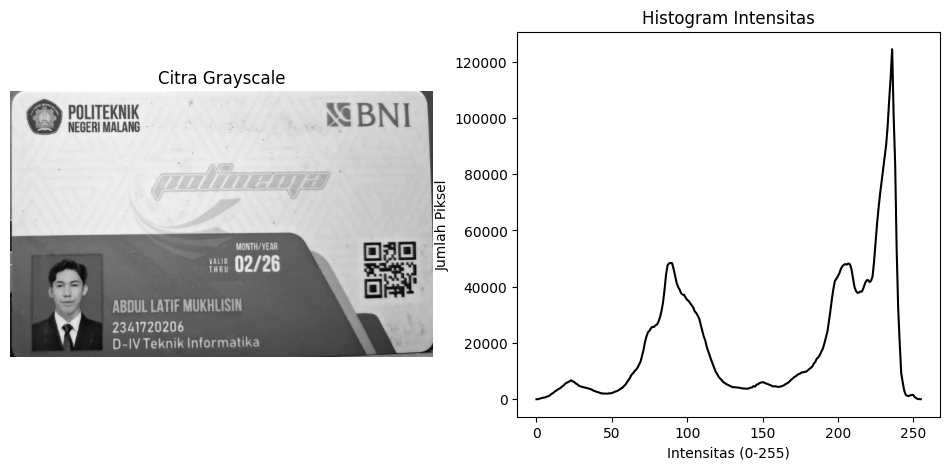

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca citra berwarna
img = cv.imread('/content/drive/MyDrive/Tugas PCVK/KTM Abdul Latif.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Konversi ke grayscale untuk analisis intensitas
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

# Hitung histogram
hist, bins = np.histogram(gray, bins=256, range=(0,256))

# Plot hasil
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Citra Grayscale")
plt.axis("off")

plt.subplot(1,2,2)
plt.plot(hist, color='black')
plt.title("Histogram Intensitas")
plt.xlabel("Intensitas (0-255)")
plt.ylabel("Jumlah Piksel")

plt.show()


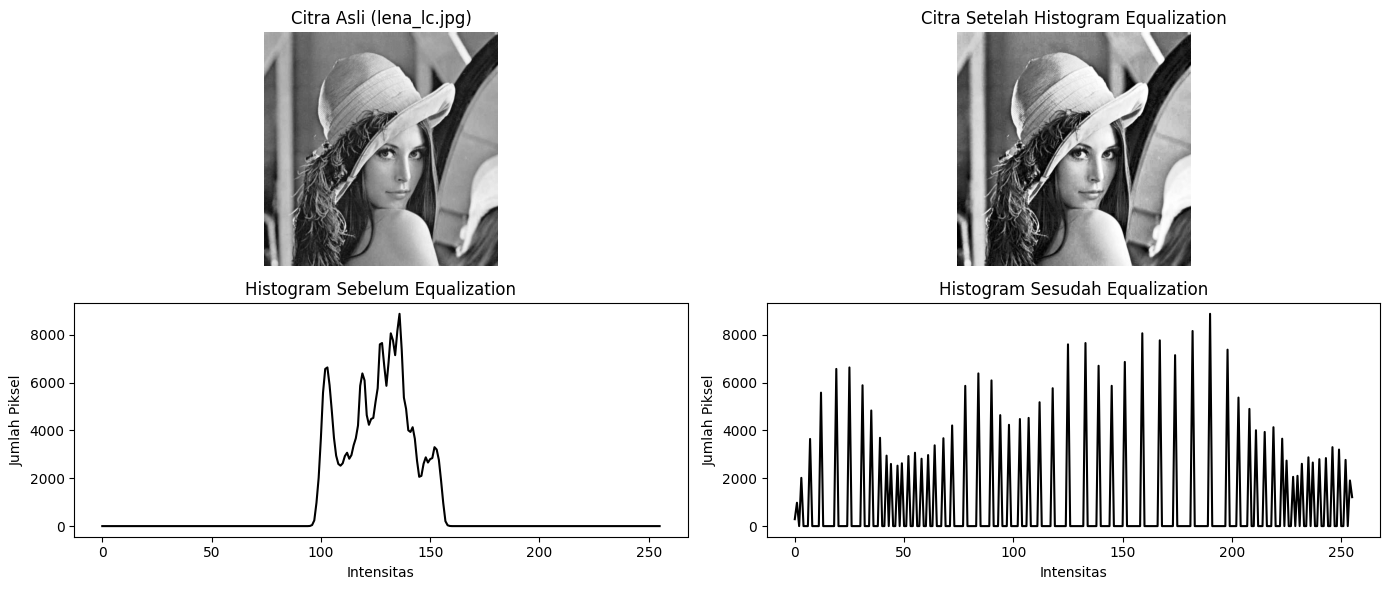

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca citra
img = cv.imread(('/content/drive/MyDrive/Tugas PCVK/lena_lc.jpg'), cv.IMREAD_GRAYSCALE)

# 2. Histogram sebelum equalization
hist_before, bins = np.histogram(img, bins=256, range=(0,256))

# 3. Lakukan Histogram Equalization
equalized = cv.equalizeHist(img)

# 4. Histogram sesudah equalization
hist_after, bins = np.histogram(equalized, bins=256, range=(0,256))

# 5. Plot hasil
plt.figure(figsize=(14,6))

# Citra sebelum & sesudah
plt.subplot(2,2,1)
plt.imshow(img, cmap="gray")
plt.title("Citra Asli (lena_lc.jpg)")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(equalized, cmap="gray")
plt.title("Citra Setelah Histogram Equalization")
plt.axis("off")

# Histogram sebelum & sesudah
plt.subplot(2,2,3)
plt.plot(hist_before, color="black")
plt.title("Histogram Sebelum Equalization")
plt.xlabel("Intensitas")
plt.ylabel("Jumlah Piksel")

plt.subplot(2,2,4)
plt.plot(hist_after, color="black")
plt.title("Histogram Sesudah Equalization")
plt.xlabel("Intensitas")
plt.ylabel("Jumlah Piksel")

plt.tight_layout()
plt.show()
